# Map of sub-domain of ANHA12

In [1]:
import os
os.environ['PROJ_LIB'] = '/home/brogalla/anaconda3/share/proj'

In [3]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import pickle

%matplotlib notebook

Bathymetry:

In [4]:
mesh       = nc.Dataset('/ocean/brogalla/GEOTRACES/analysis-birgit/notebooks/ANHA12/ANHA12_mesh1.nc')
mesh_lon   = np.array(mesh.variables['nav_lon'])
mesh_lat   = np.array(mesh.variables['nav_lat'])
mesh_bathy = np.array(mesh.variables['hdept'][0])

Figure:

<IPython.core.display.Javascript object>


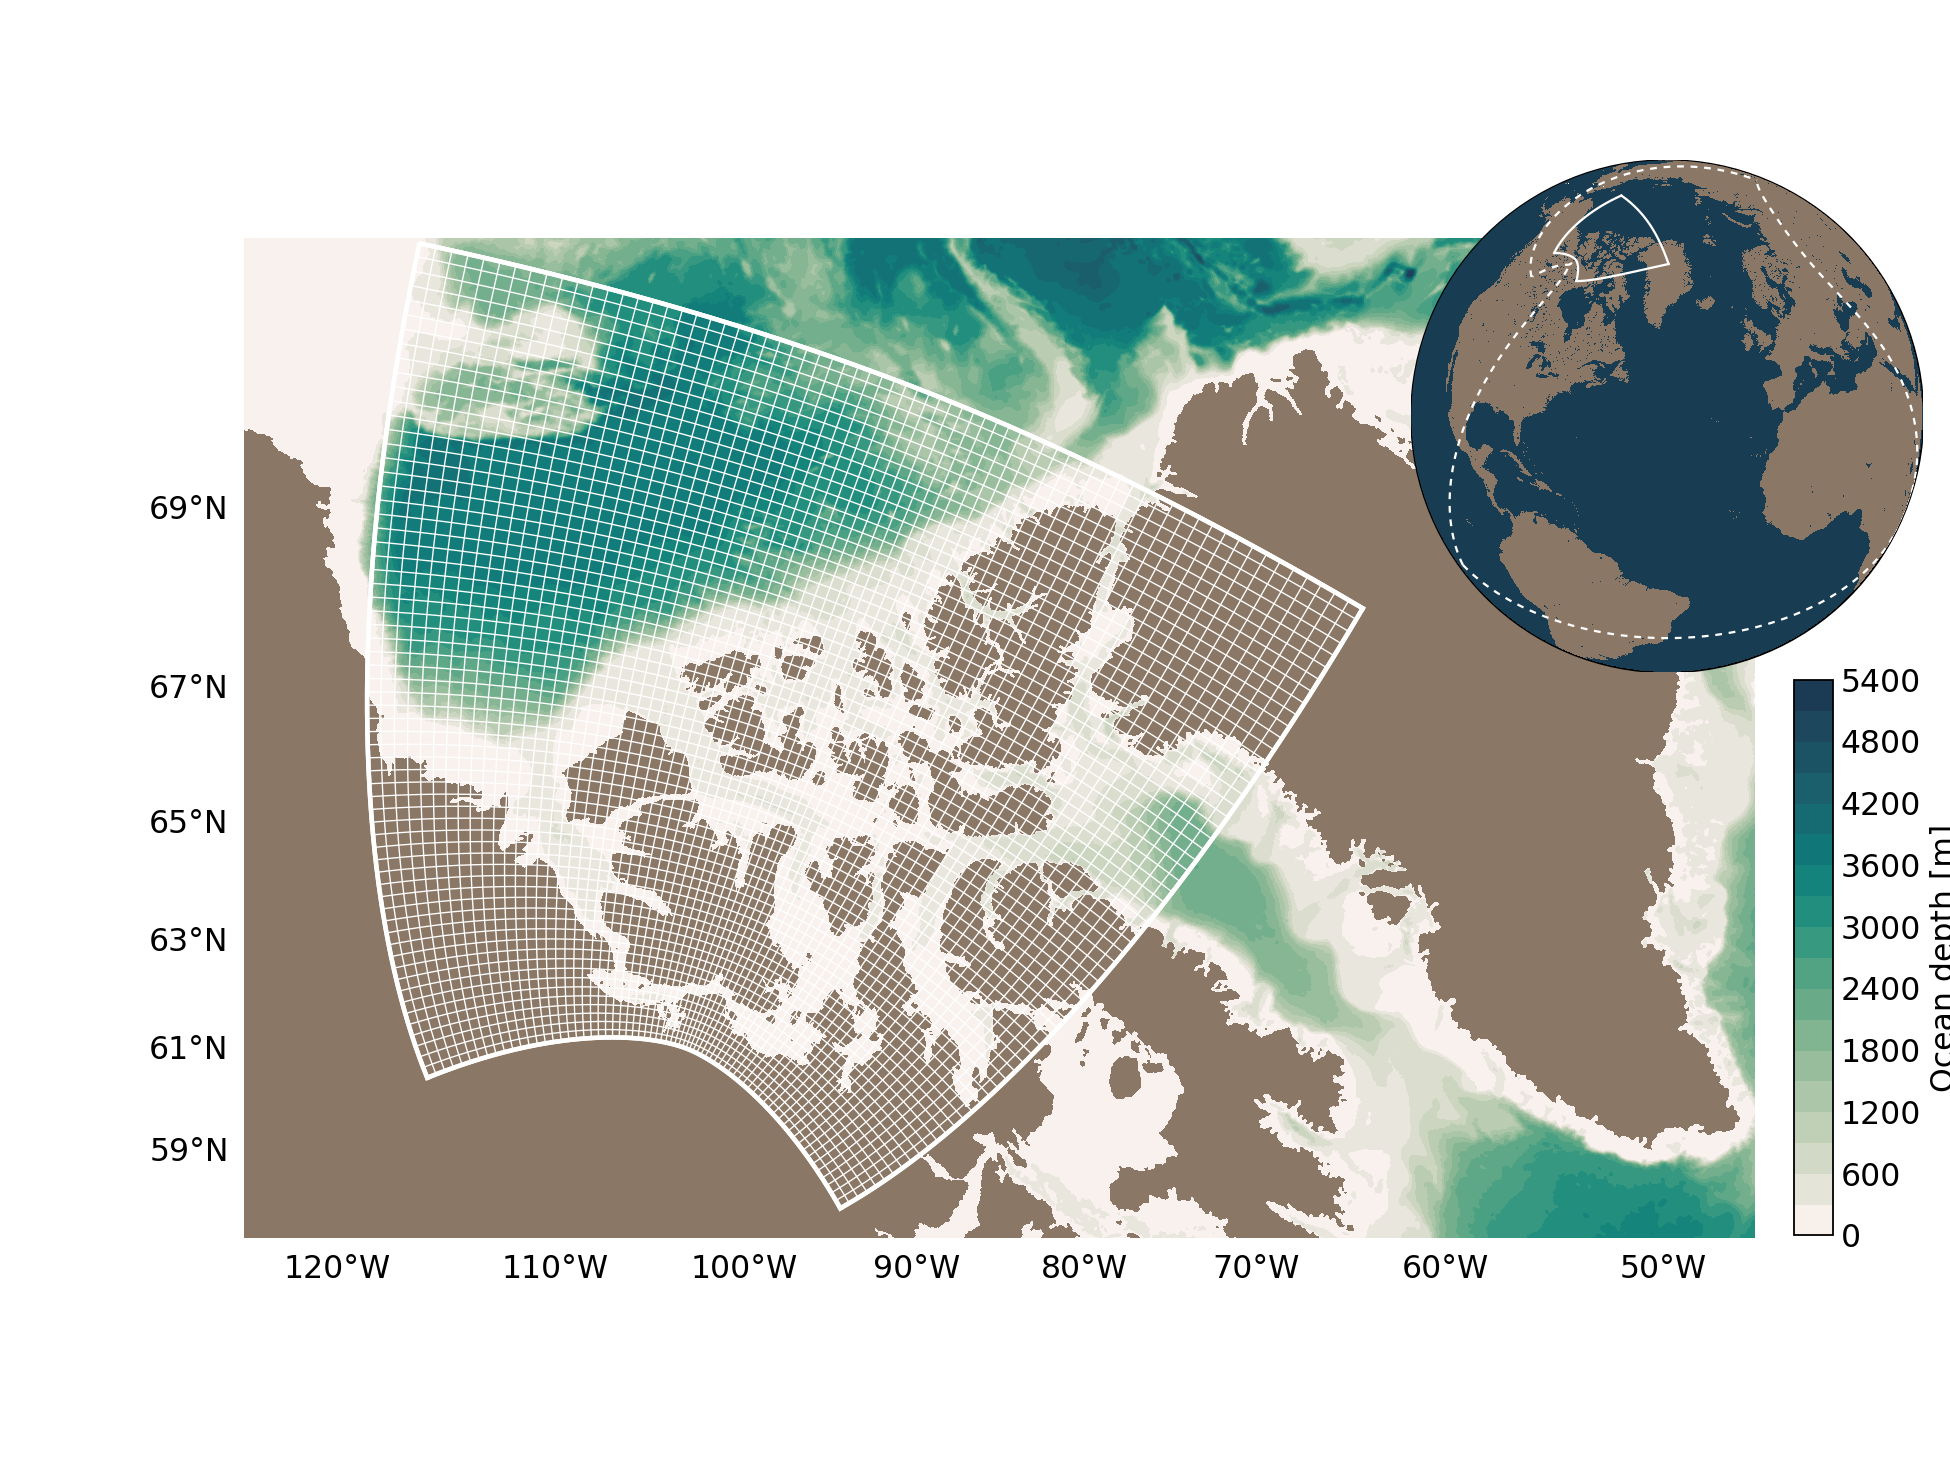

In [6]:
fig, ax1, proj1, ax2, proj2 = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/' + \
                                               'surface-land-map-globe.pickle','rb'))

# Globe: --------------------------------------------------------------------------------------
x, y  = proj2(mesh_lon, mesh_lat) 

bath = proj2.contourf(x, y, mesh_bathy, 20, cmap=cmocean.cm.tempo, vmin=0, vmax=6000, zorder=1)

res=10
# Sub-domain
proj2.plot(x[1480:2180,160], y[1480:2180,160]      , 'w-', lw=1,zorder=3)
proj2.plot(x[1480:2180,799], y[1480:2180,799]      , 'w-', lw=1,zorder=3)
proj2.plot(x[1480,160:800], y[1480,160:800]        , 'w-', lw=1,zorder=3)
proj2.plot(x[2180,160:800], y[2180,160:800]        , 'w-', lw=1,zorder=3)
# full domain
proj2.plot(x[0:-1:res,0] , y[0:-1:res,0]        , 'w--', lw=1,zorder=3, dashes=(3, 3))
proj2.plot(x[100:-1:res,-1], y[100:-1:res,-1]   , 'w--', lw=1,zorder=3, dashes=(3, 3))
proj2.plot(x[0,0:-1:res] , y[0,0:-1:res]        , 'w--', lw=1,zorder=3, dashes=(3, 3))
proj2.plot(x[-1,0:-1:res], y[-1,0:-1:res]       , 'w--', lw=1,zorder=3, dashes=(3, 3))

# Sub-domain map: ---------------------------------------------------------------------------
x_sub, y_sub  = proj1(mesh_lon, mesh_lat) 
proj1.plot(x_sub[1480:2180,799],   y_sub[1480:2180,799],   'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[1480:2180,799].T, y_sub[1480:2180,799].T, 'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[1480:2180,160],   y_sub[1480:2180,160],   'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[1480:2180,160].T, y_sub[1480:2180,160].T, 'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[1480,160:799],    y_sub[1480,160:799],    'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[1480,160:799].T,  y_sub[1480,160:799].T,  'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[2180,160:799],    y_sub[2180,160:799],    'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[2180,160:799].T,  y_sub[2180,160:799].T,  'w-', lw=2.0,zorder=5)

proj1.plot(x_sub[1480:2190:res,160:810:res], y_sub[1480:2190:res,160:810:res], 'w-', lw=0.6, zorder=3);
proj1.plot(x_sub[1480:2190:res,160:810:res].T, y_sub[1480:2190:res,160:810:res].T, 'w-', lw=0.6, zorder=3);

# Color bar: --------------------------------------------------------------------------------
cbaxes = fig.add_axes([0.92, 0.155, 0.02, 0.38]);
CBar = plt.colorbar(bath, ax=ax1, cax=cbaxes); 
a    = CBar.set_label('Ocean depth [m]', fontsize=14)
CBar.ax.tick_params(axis='y', length=0, labelsize=14)

fig.savefig('/ocean/brogalla/GEOTRACES/figures/sub-domain-map.png', bbox_inches='tight', dpi=300)